In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import pickle
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
# using Seaborn Style
plt.style.use('seaborn')

In [2]:
# Reading CSV File using Pandas
df = pd.read_csv('../Real estate.csv')

In [3]:
# Columns Names
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


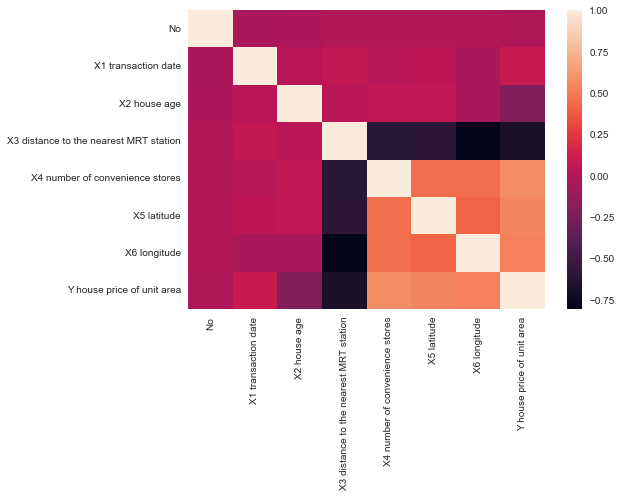

In [5]:
# Generating HeatMap of coorelation 
sns.heatmap(df.corr())
plt.show()

In [6]:
#Normalizing The Dataset
df_norm = pd.DataFrame(preprocessing.normalize(df),columns=df.columns)

In [7]:
df_norm.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.000495,0.996909,0.015848,0.042037,0.004953,0.012373,0.060194,0.018770
1,0.000980,0.986502,0.009557,0.150258,0.004411,0.012243,0.059565,0.020682
2,0.001432,0.961229,0.006349,0.268276,0.002387,0.011928,0.058022,0.022580
3,0.001909,0.961141,0.006349,0.268263,0.002387,0.011928,0.058019,0.026159
4,0.002434,0.979673,0.002434,0.190095,0.002434,0.012158,0.059156,0.020977


In [8]:
independent_variables = df.columns.to_list()
independent_variables.remove("No")
independent_variables.remove("Y house price of unit area")
independent_variables

['X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude']

In [9]:
X,y = df_norm[independent_variables].values,df_norm["Y house price of unit area"].values

In [10]:
# Shape of X and y
X.shape,y.shape

((414, 6), (414,))

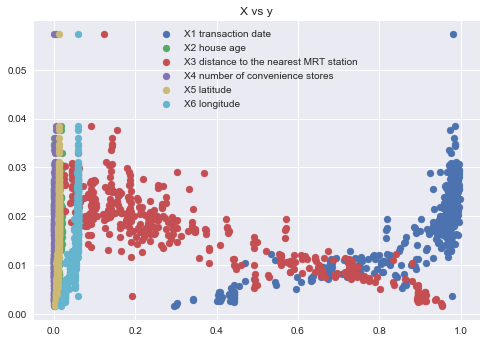

In [11]:
# Plot Between X1 and y && X2 and y
for i in range(len(independent_variables)):
    plt.scatter(X[:,i],y,label = independent_variables[i])
    plt.legend()
plt.title("X vs y")
plt.show()

In [12]:
# Splitting dataset in training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
# creating Linearregression model
model = LinearRegression()

In [14]:
# Fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [15]:
# Saving the model using pickle
_model = "model.sav"
with open(_model,"wb+") as f:
    pickle.dump(model,f)

In [16]:
#Loading the model using pickle
with open(_model,"rb+") as f:
    model = pickle.load(f)

In [17]:
# Generating prediction of X_train and X_test 
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

In [18]:
# Saving Comparison of y_test_actual Vs y_test_predicted
yTestDF = pd.DataFrame({'y_test_actual' : y_test,'y_test_predicted' : y_test_predicted})
yTestDF.to_csv('y_test.csv',index=False)

# Saving Comparison of y_train_actual Vs y_train_predicted
yTrainDF = pd.DataFrame({'y_train_actual' : y_train,'y_train_predicted' : y_train_predicted})
yTrainDF.to_csv('y_train.csv',index=False)

In [19]:
# Model's Coefficient and Intercept
model.coef_,model.intercept_,

(array([ 4.81975861e+00, -2.69343981e-01, -2.52984792e-02,  4.04754198e-01,
         2.64801755e+02, -1.34271205e+02]),
 0.029135581152747066)

### Linear Regression
<strong> y = x<sup>T</sup> * m + c </strong>

Here,
x = indepedent variable 
y = House price of unit area

m = model.coef_ i.e. slope
c = model.intercept_ i.e. intercept

m.shape = (6,1)

let n be the number of elements 
x.shape = (n,6)

x<sup>T</sup>.shape = (6,n)
    
c.shape = (1,1)
y.shape = (n,6) * (6,1) + (1,1)

y.shape = (n,1)

In [20]:
# Genrating a Best Fit Line
m = model.coef_
c = model.intercept_

_X = []
for i in range(len(independent_variables)):
    _X.append(np.linspace(min(X[:,i]),max(X[:,i]),100))
    
_y = np.dot(np.transpose(_X),m) + c

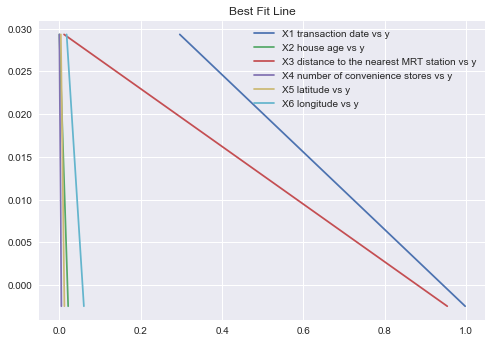

In [21]:
#plotting The Best Fit Line
for i in range(len(independent_variables)):
    plt.plot(_X[i],_y,label=independent_variables[i] + " vs y")
    plt.legend()
plt.title("Best Fit Line")
plt.show()

In [22]:
# Genrating Correlation between X and y

correlation = []

for i in range(len(independent_variables)):
    correlation.append(pd.Series(y).corr(pd.Series(X[:,i])))

print(correlation,end="\n\n")

correlation = np.abs(correlation)

print("Since Absolute Value of "+ independent_variables[np.argmax(correlation)] +" is greater than rest attributes, that means Distance to the nearest MRT station is more significant predictor of house price.")

[0.7917806996384039, 0.06291588852786793, -0.8490051041799057, 0.6588178578231008, 0.7920124632497336, 0.7917306759597925]

Since Absolute Value of X3 distance to the nearest MRT station is greater than rest attributes, that means Distance to the nearest MRT station is more significant predictor of house price.


In [23]:
# Calculating all Errors
def calculateError(y_actual,y_pred):
    MSE = mean_squared_error(y_actual,y_pred)
    MAE = mean_absolute_error(y_actual,y_pred)
    RMSE = np.sqrt(MSE)
    return MSE,MAE,RMSE

In [24]:
err = calculateError(y_train,y_train_predicted)
trainError = {
    "Mean Square Error" : err[0],
    "Mean Absolute Error" : err[1],
    "Root Mean Square Error" : err[2]
}

err = calculateError(y_test,y_test_predicted)
testError = {
    "Mean Square Error" : err[0],
    "Mean Absolute Error" : err[1],
    "Root Mean Square Error" : err[2]
}

In [25]:
trainError

{'Mean Square Error': 1.424199848097977e-05,
 'Mean Absolute Error': 0.0023850204888321057,
 'Root Mean Square Error': 0.003773857241732889}

In [26]:
testError

{'Mean Square Error': 1.1722597393511321e-05,
 'Mean Absolute Error': 0.00210735877067638,
 'Root Mean Square Error': 0.0034238278860817934}